# Notebook for plotting ComCam gains.

Adapted to AuxTel on 11 Apr 2022\
Initially written 18 Feb 2022 by Craig Lage.

In [49]:
date = '05May22'
print(f'Running this code on {date}')

Running this code on 05May22


In [50]:
import sys, os, glob, time
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import lsst.daf.butler as dafButler

In [58]:
exposure1 = 2021021700096
butler1 = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/cslage/latiss/ptc_20210217"])

exposure2 = 2022040500096
butler2 = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220405_flat"])

exposure3 = 2022050400134
butler3 = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220504_flat"])

exposure4 = 2022050500260
butler4 = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220505"])

In [59]:
RAFT = 'RXX'
butlers = [butler1, butler2, butler3, butler4]
exposures = [exposure1, exposure2, exposure3, exposure4]
run_names = ['Feb2021-Empty', 'Mar2022-SDSSr', 'May2022-SDSSi', 'May2022-SDSSg']
markers = ['o', 'x', 'P', '*', '^', 'v']

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

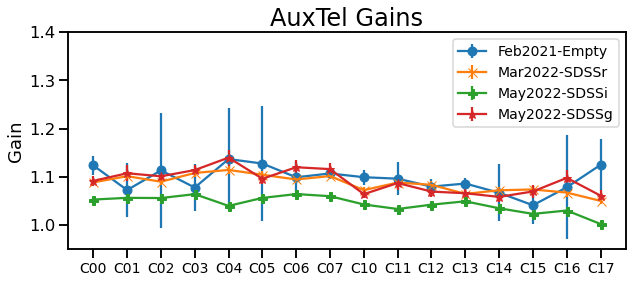

In [61]:
plt.figure(figsize=(10,4))
plt.title("AuxTel Gains", fontsize=24)
for i,butler in enumerate(butlers):
    run_name = run_names[i]
    ptcDataset = butler.get('ptc', exposure=exposures[i], detector=0)
    gain_data = ptcDataset.gain
    gain_err_data = ptcDataset.gainErr
    amps = gain_data.keys()
    gains = []
    gain_err = []
    amp_nums = []
    for ii, amp in enumerate(amps):
        gains.append(gain_data[amp])
        gain_err.append(gain_err_data[amp])
        amp_nums.append(ii)
    plt.errorbar(amp_nums, gains, yerr=gain_err, marker = markers[i], label = run_name)
    plt.ylim(0.95, 1.4)
    plt.ylabel("Gain")
    plt.xticks(amp_nums,amps, fontsize=14)
    plt.legend(loc = 'upper right', fontsize = 14)

plt.savefig(f'./plots/Gain_Summary_{date}.pdf',dpi=100)

In [62]:
exposure2a = 2022040500096
butler2a = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220405"])
exposure2b = 2022040500096
butler2b = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220405_flat"])

exposure2c = 2022040500096
butler2c = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220405_rerun"])

In [56]:
RAFT = 'RXX'
butlers = [butler2a, butler2b, butler2c]
exposures = [exposure2a, exposure2b, exposure2c]
run_names = ['Craig`s script','Current DM script: doFlat:Fale', 'Current DM script']
markers = ['o', 'x', 'P', '*', '^', 'v']

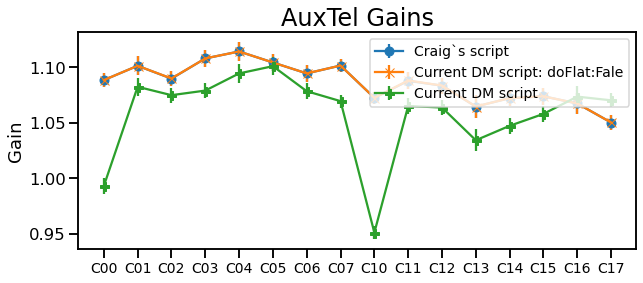

In [57]:
plt.figure(figsize=(10,4))
plt.title("AuxTel Gains", fontsize=24)
for i,butler in enumerate(butlers):
    run_name = run_names[i]
    ptcDataset = butler.get('ptc', exposure=exposures[i], detector=0)
    gain_data = ptcDataset.gain
    gain_err_data = ptcDataset.gainErr
    amps = gain_data.keys()
    gains = []
    gain_err = []
    amp_nums = []
    for ii, amp in enumerate(amps):
        gains.append(gain_data[amp])
        gain_err.append(gain_err_data[amp])
        amp_nums.append(ii)
    plt.errorbar(amp_nums, gains, yerr=gain_err, marker = markers[i], label = run_name)
    # plt.ylim(0.95, 1.4)
    plt.ylabel("Gain")
    plt.xticks(amp_nums,amps, fontsize=14)
    plt.legend(loc = 'upper right', fontsize = 14)

plt.savefig(f'./plots/Gain_Compare_Scripts_{date}.pdf',dpi=100)